This notebook can be used together with `org.drasyl.handler.connection.ConnectionAnalyzeHandler` to analyze connections.

In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import os
import sys

def get_newest_csv_file(dir_path):
    csv_files = []
    for file in os.listdir(dir_path):
        if file.startswith("ConnectionAnalyzeHandler") and file.endswith(".csv"):
            csv_files.append(os.path.join(dir_path, file))
    if not csv_files:
        return None
    newest_csv_file = max(csv_files, key=os.path.getctime)
    return newest_csv_file

In [2]:
dir_path = os.path.join(os.path.dirname(sys.path[0]), "drasyl-integration-tests")
print("dir path : " + dir_path)
csv_file = get_newest_csv_file(dir_path)
print("csv file : " + str(csv_file))

dir path : /Users/heiko/Development/drasyl/drasyl-integration-tests
csv file : /Users/heiko/Development/drasyl/drasyl-integration-tests/ConnectionAnalyzeHandler_idd59501f4_L622d860a23517b0e20e59d8a481db4da2c89649c979d7318bc4ef19828f4663e_Rf43772fd65e9fa28e729c71c199ef21c7f2b019be924e87f94f3dc27e9e63853.csv.csv


In [3]:
df = pd.read_csv(csv_file)

# RFC 9293: Send Sequence Variables
df['Rel.SND.UNA'] = df['SND.UNA'] - df['ISS']
df['Rel.SND.NXT'] = df['SND.NXT'] - df['ISS']
df['Rel.SND.WL1'] = df['SND.WL1'] - df['IRS']
df['Rel.SND.WL2'] = df['SND.WL2'] - df['IRS']

# RFC 9293: Receive Sequence Variables
df['Rel.RCV.NXT'] = df['RCV.NXT'] - df['IRS']

# RFC 5681: TCP Congestion Control
df['FLIGHT SIZE'] = df['SND.NXT'] - df['SND.UNA']

df

,pid,time,SND.UNA,SND.NXT,SND.WND,SND.WL1,SND.WL2,ISS,SND.BUF,RCV.NXT,...,SRTT,RTO,cwnd,ssthresh,Rel.SND.UNA,Rel.SND.NXT,Rel.SND.WL1,Rel.SND.WL2,Rel.RCV.NXT,FLIGHT SIZE
0,86871,"Mon, 24 Apr 2023 10:12:33 +0200",1554956913,1554956913,65324,1887126415,1554956913,1554956701,0,1887126415,...,14.197987,1000,3980,65535,212,212,135,-332169367,135,0
1,86871,"Mon, 24 Apr 2023 10:12:33 +0200",1554956913,1554956913,65324,1887126415,1554956913,1554956701,0,1887126415,...,14.197987,1000,3980,65535,212,212,135,-332169367,135,0
2,86871,"Mon, 24 Apr 2023 10:12:33 +0200",1554956913,1554956913,65324,1887126415,1554956913,1554956701,0,1887126415,...,14.197987,1000,3980,65535,212,212,135,-332169367,135,0
3,86871,"Mon, 24 Apr 2023 10:12:33 +0200",1554956913,1554956913,65324,1887126415,1554956913,1554956701,0,1887126492,...,344.307834,2999,3980,65535,212,212,135,-332169367,212,0
4,86871,"Mon, 24 Apr 2023 10:12:33 +0200",1554956913,1554956913,65324,1887126415,1554956913,1554956701,0,1887126492,...,344.307834,2999,3980,65535,212,212,135,-332169367,212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,86871,"Mon, 24 Apr 2023 10:12:44 +0200",1554956914,1554956914,65324,1887126492,1554956914,1554956701,0,1887126493,...,268.079435,2290,1241,2480,213,213,212,-332169366,213,0
115,86871,"Mon, 24 Apr 2023 10:12:44 +0200",1554956914,1554956914,65324,1887126492,1554956914,1554956701,0,1887126493,...,268.079435,2290,1241,2480,213,213,212,-332169366,213,0
116,86871,"Mon, 24 Apr 2023 10:12:44 +0200",1554956914,1554956914,65324,1887126492,1554956914,1554956701,0,1887126493,...,268.079435,2290,1241,2480,213,213,212,-332169366,213,0
117,86871,"Mon, 24 Apr 2023 10:12:44 +0200",1554956914,1554956914,65324,1887126492,1554956914,1554956701,0,1887126493,...,268.079435,2290,1241,2480,213,213,212,-332169366,213,0


# RFC 9293: Send Sequence Variables

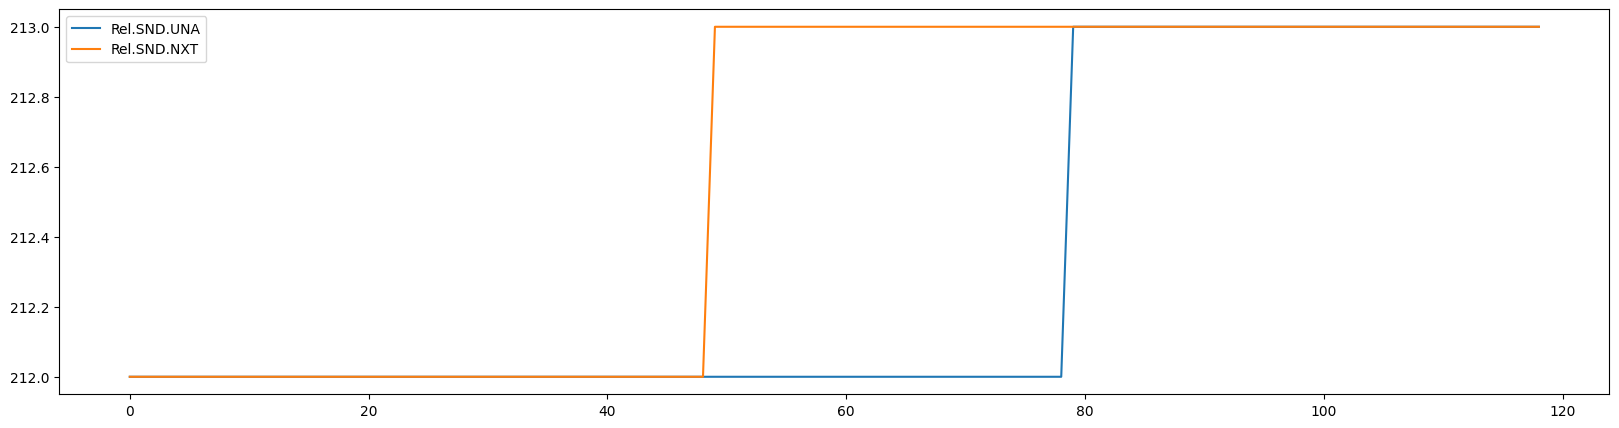

In [4]:
df.plot(y=['Rel.SND.UNA', 'Rel.SND.NXT'], figsize=(20, 5))
mp.show()

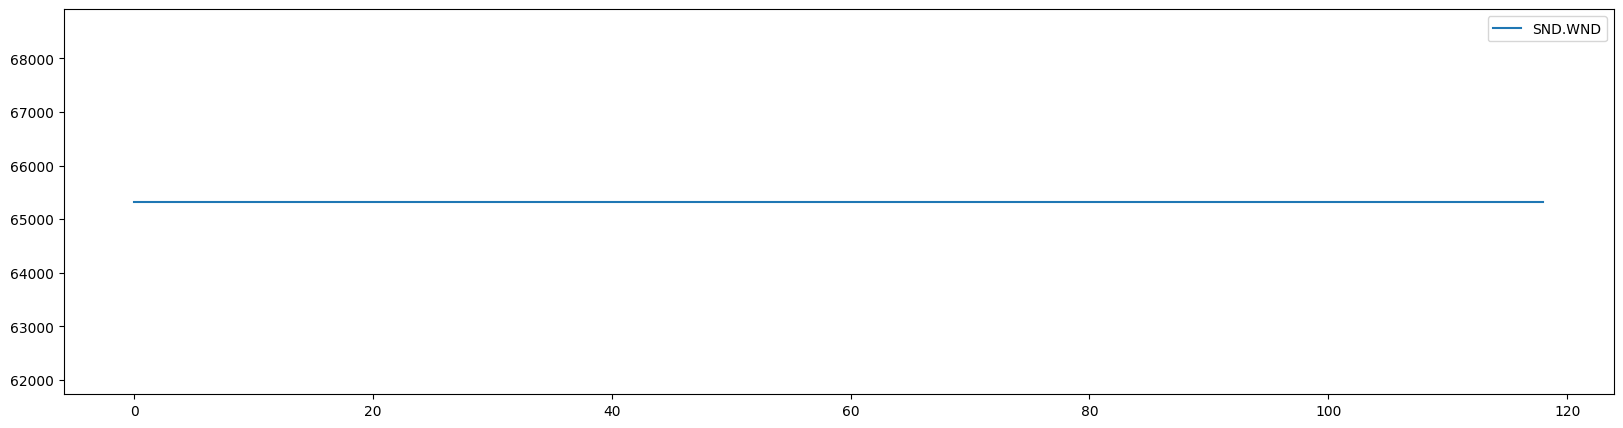

In [5]:
df.plot(y=['SND.WND'], figsize=(20, 5))
mp.show()

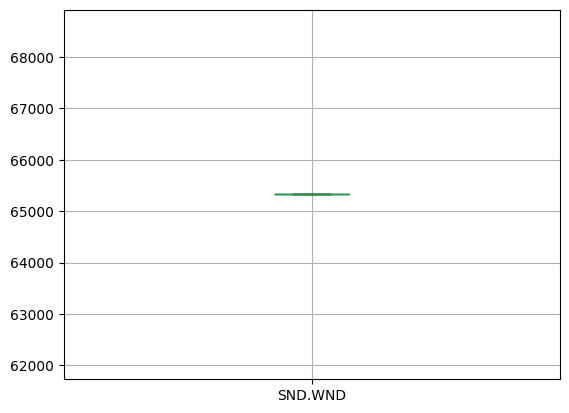

In [6]:
df.boxplot(column=['SND.WND'])
mp.show()

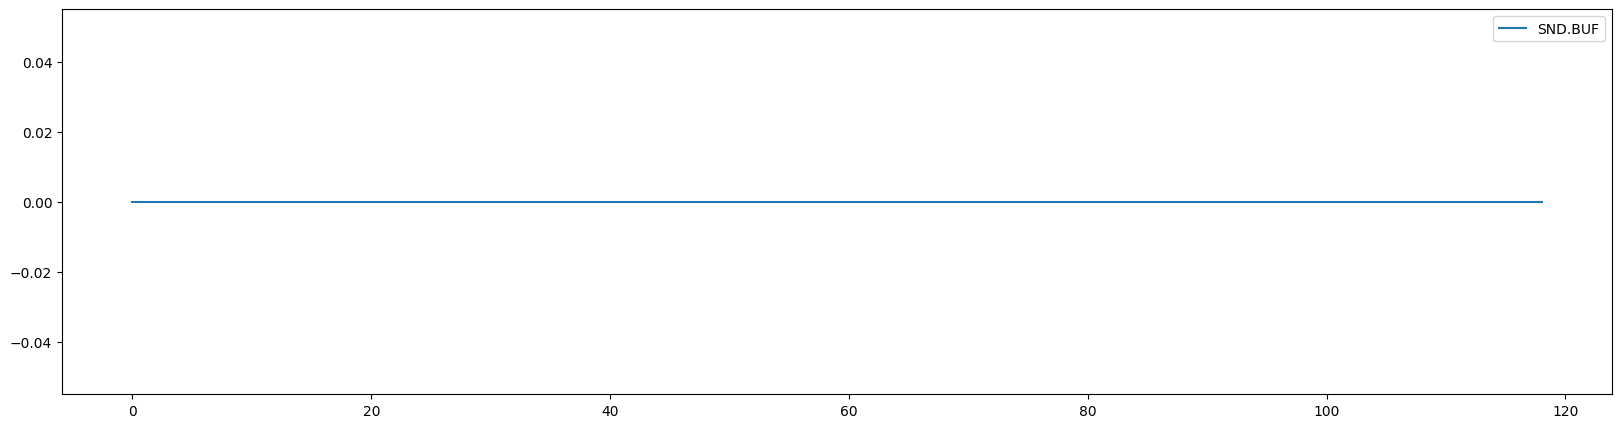

In [7]:
df.plot(y=['SND.BUF'], figsize=(20, 5))
mp.show()

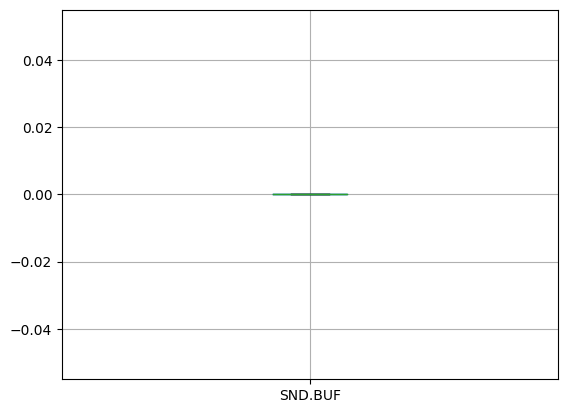

In [8]:
df.boxplot(column=['SND.BUF'])
mp.show()

# RFC 9293: Receive Sequence Variables

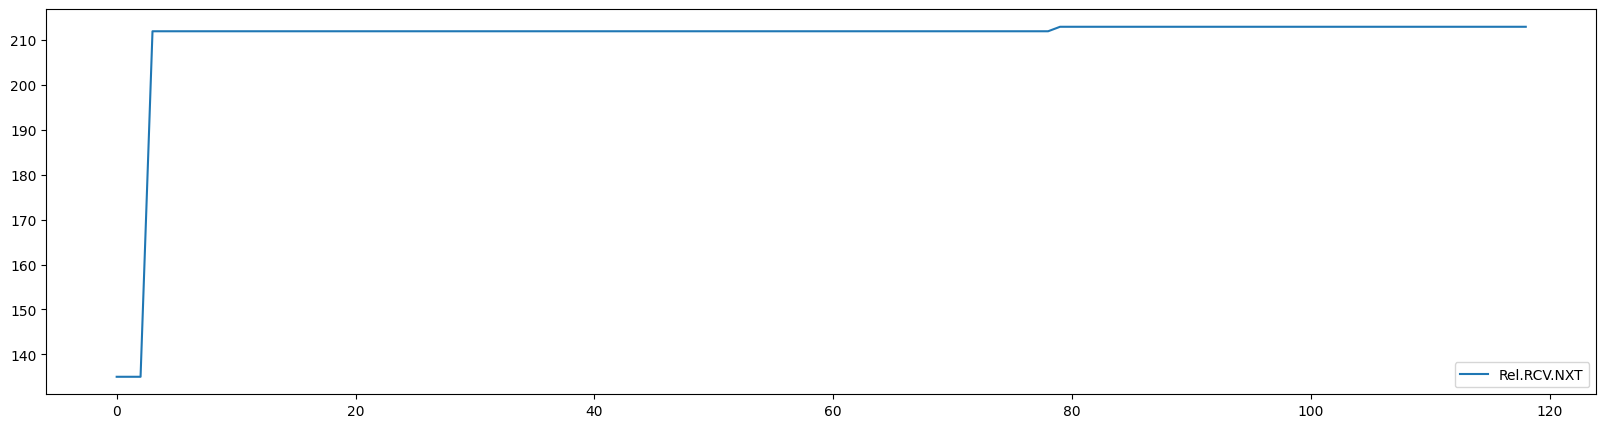

In [9]:
df.plot(y=['Rel.RCV.NXT'], figsize=(20, 5))
mp.show()

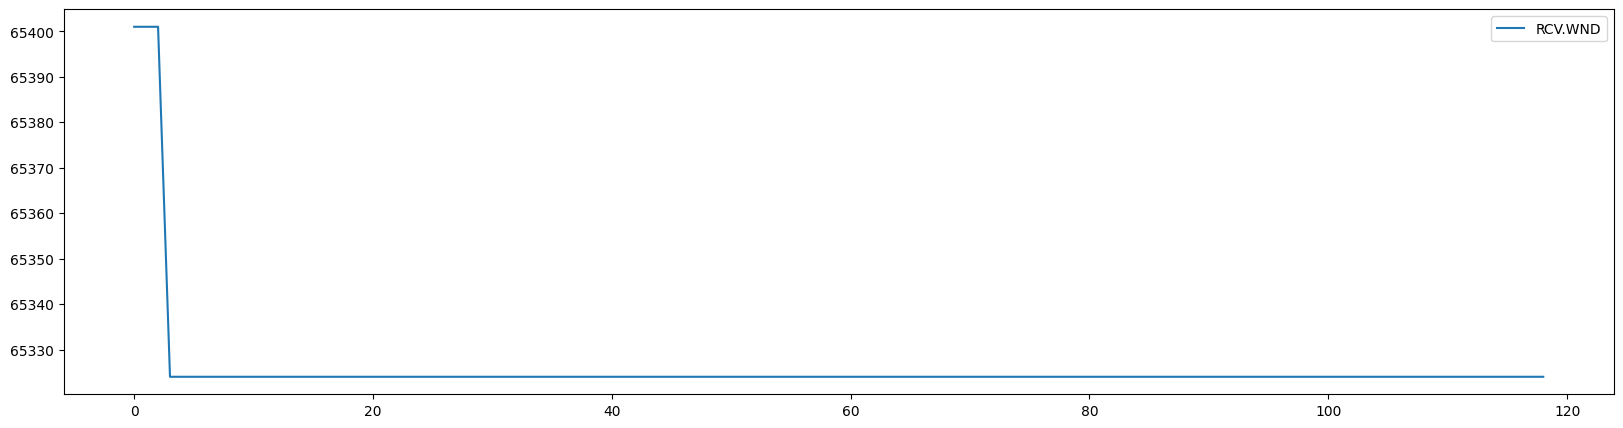

In [10]:
df.plot(y=['RCV.WND'], figsize=(20, 5))
mp.show()

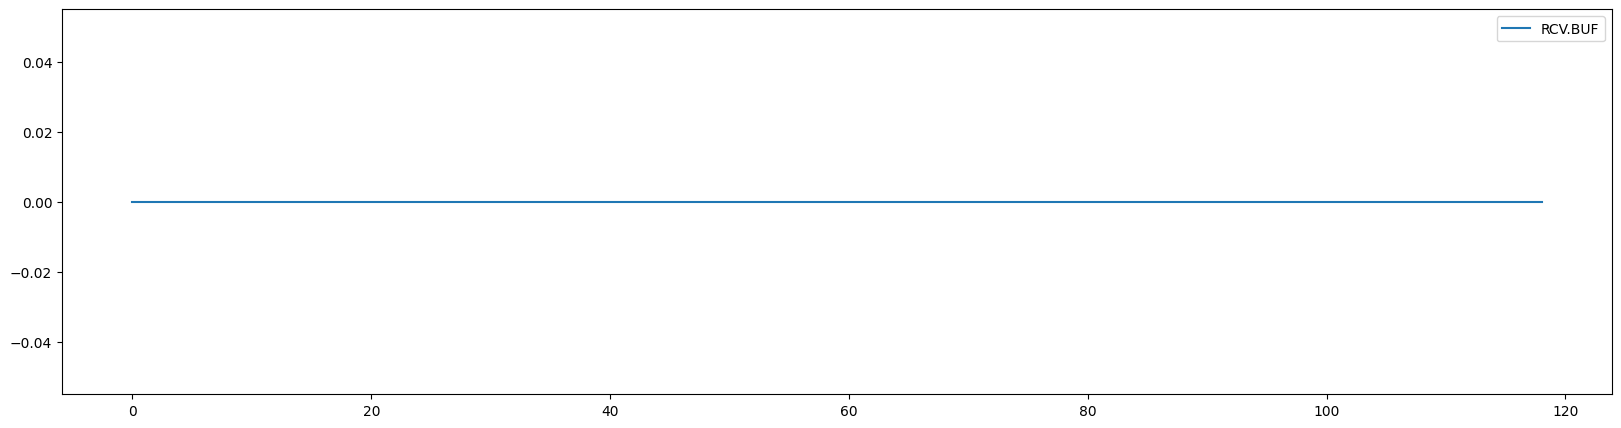

In [11]:
df.plot(y=['RCV.BUF'], figsize=(20, 5))
mp.show()

# RFC 6298: Retransmission Timer Computation

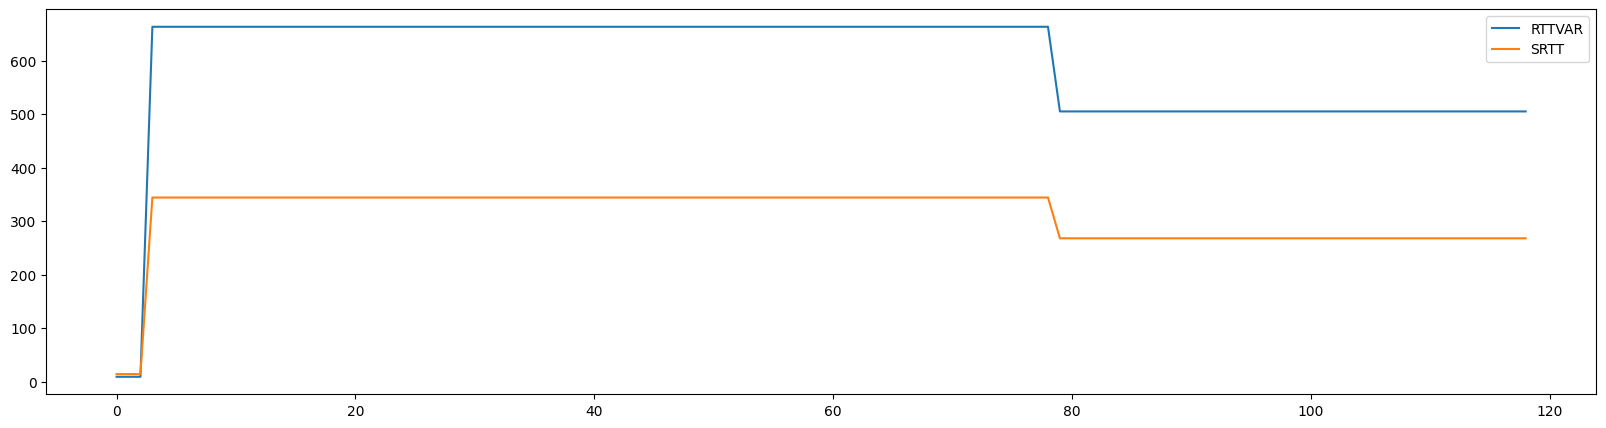

In [12]:
df.plot(y=['RTTVAR', 'SRTT'], figsize=(20, 5))
mp.show()

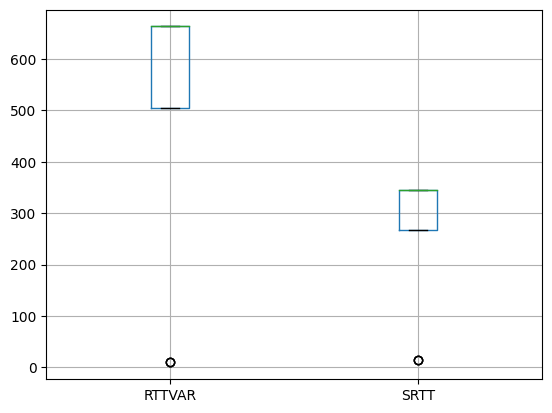

In [13]:
df.boxplot(column=['RTTVAR', 'SRTT'])
mp.show()

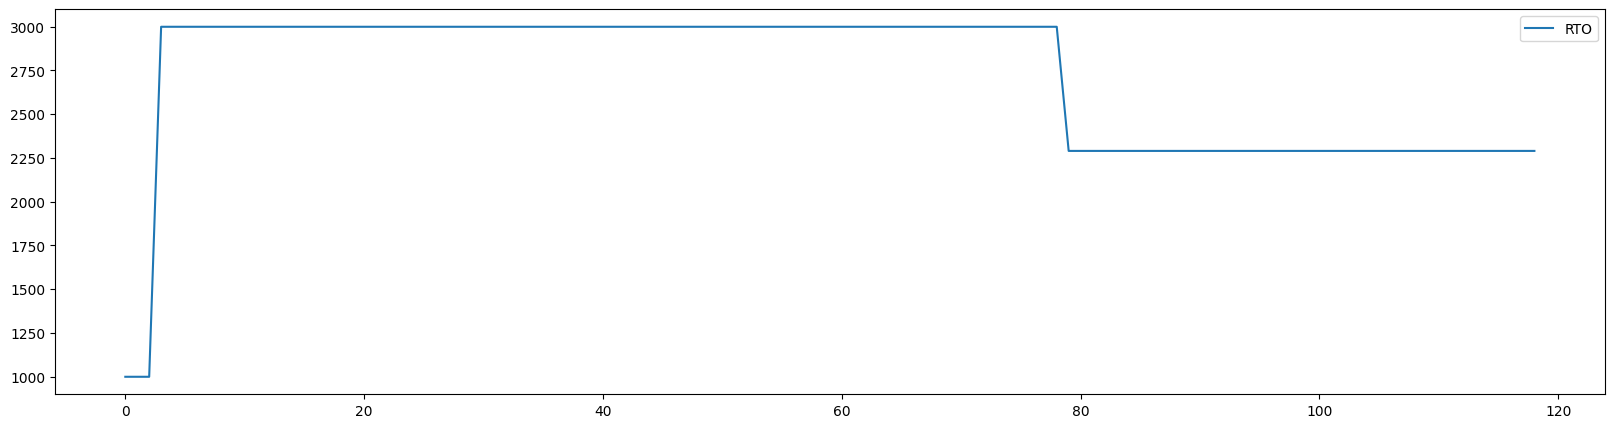

In [14]:
df.plot(y=['RTO'], figsize=(20, 5))
mp.show()

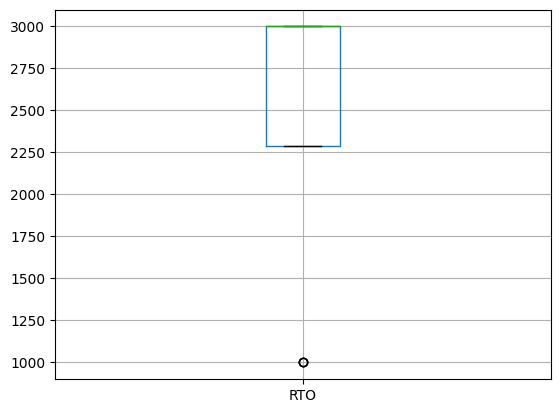

In [15]:
df.boxplot(column=['RTO'])
mp.show()

# RFC 5681: Congestion Control Algorithms

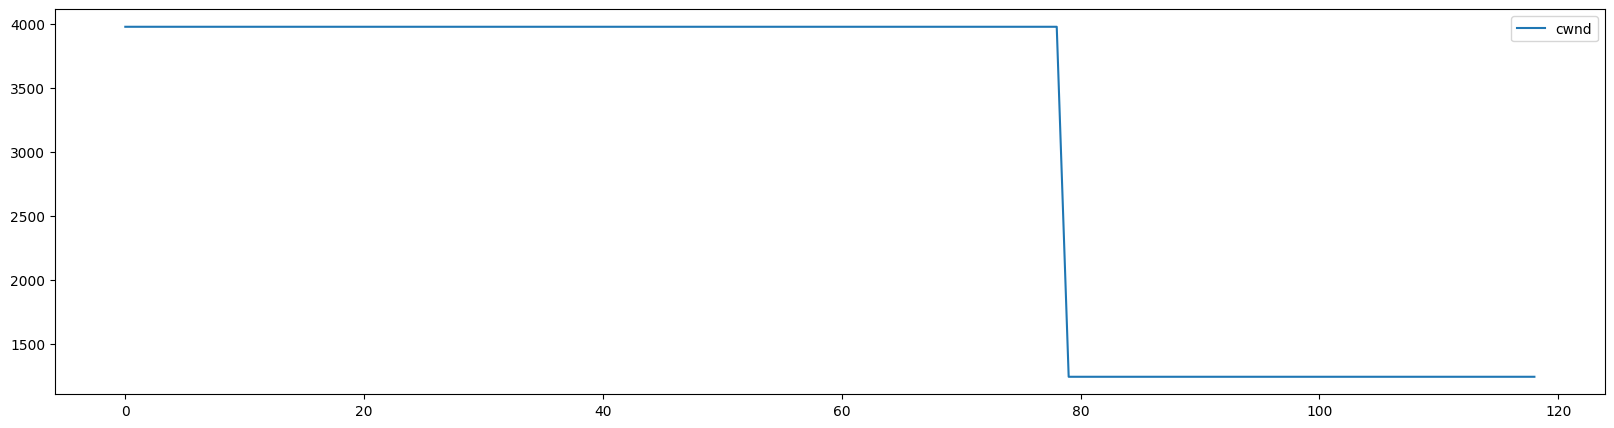

In [16]:
df.plot(y=['cwnd'], figsize=(20, 5))
mp.show()

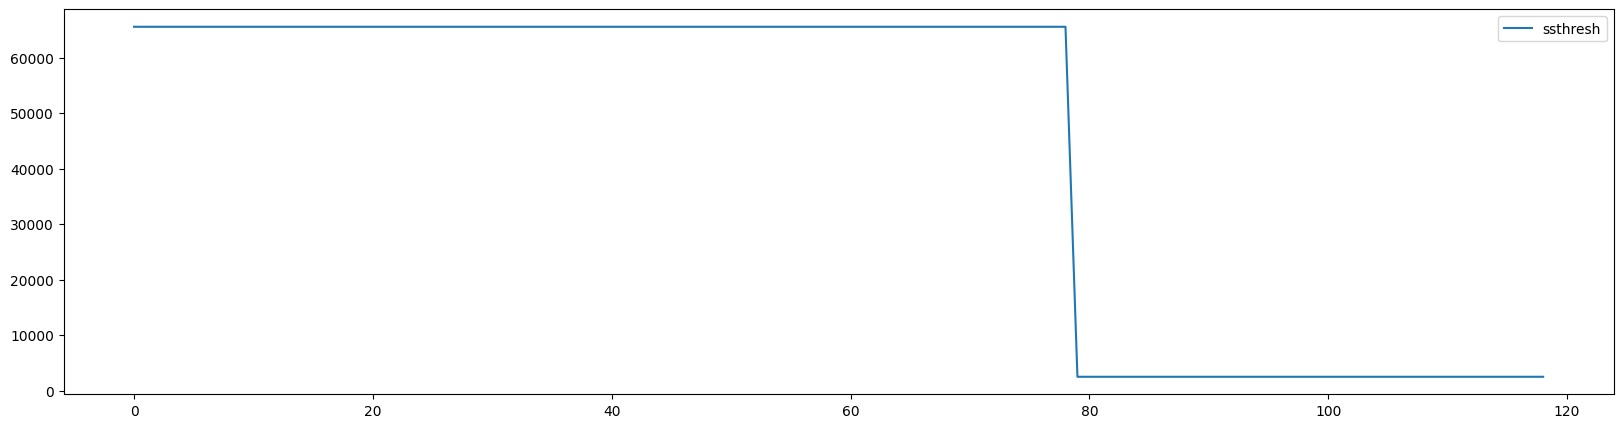

In [17]:
df.plot(y=['ssthresh'], figsize=(20, 5))
mp.show()

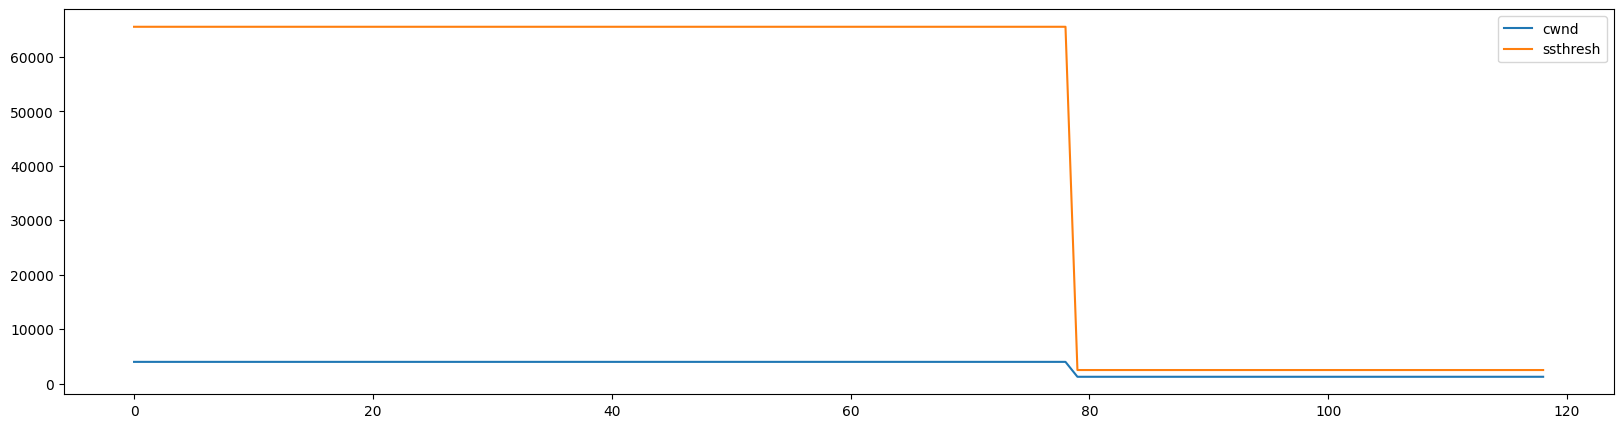

In [18]:
df.plot(y=['cwnd', 'ssthresh'], figsize=(20, 5))
mp.show()

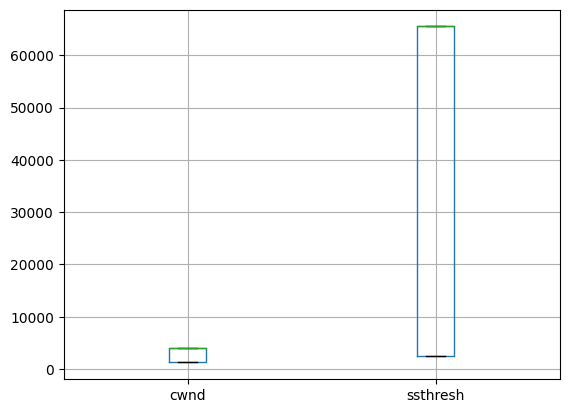

In [19]:
df.boxplot(column=['cwnd', 'ssthresh'])
mp.show()

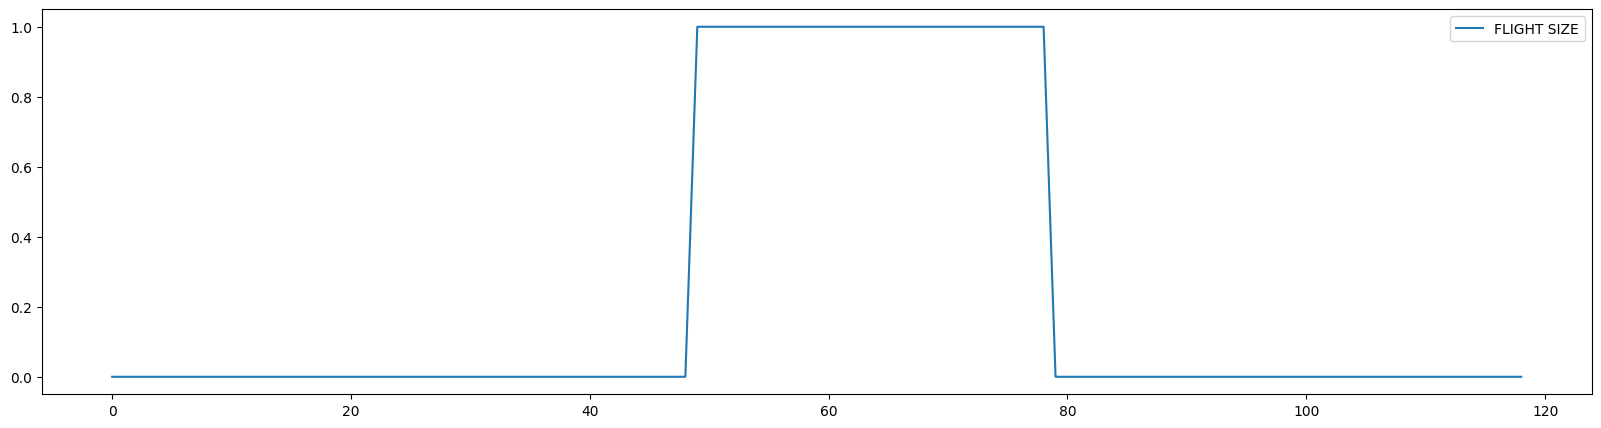

In [20]:
df.plot(y=['FLIGHT SIZE'], figsize=(20, 5))
mp.show()

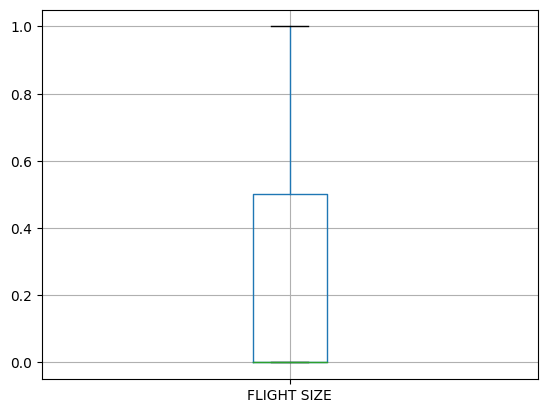

In [21]:
df.boxplot(column=['FLIGHT SIZE'])
mp.show()